<a href="https://colab.research.google.com/github/sifta/DemoNotebooks/blob/master/ChaosSim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chaos Plotter

## Instructions
The first time running this notebook, select 'Run All' from the runtime menu.  Then read through to the plots and adjust as desired.  

(c) 2020 Asif Khalak  asif.khalak@gmail.com

This work is licensed under the Creative Commons Attribution 4.0 International License. To view a copy of this license, visit http://creativecommons.org/licenses/by/4.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Mathematical Setup

Define the logistic map as follows:

$$ x_{n+1} = \alpha (x_{n})(1-x_{n}) $$

as an alternate, we can also try another function totally different function (which has a similar effect).

$$ x_{n+1} = \alpha sin(\pi x_n) $$

The following code defines these functions and some handy parameter values to go along with them.

In [0]:
#@title
# define logistic map and alternate map
class GenericMap:
  alpha_start = 0
  alpha_stop = 4
  step = 0.005
  ymin = 0
  ymax = 1

  def map(self, x, alpha):
    return np.nan

class Logit(GenericMap):
  def __init__(self):
    self.alpha_start = 2.5
    self.reference_alpha = [3.743]
  def map(self, x, alpha):
    return alpha * x * (1-x)

class Alternate(GenericMap):
  def __init__(self):
    self.alpha_start = 0
    self.alpha_stop = 2.75
    self.reference_alpha = [0.8]
    self.ymin = -np.pi
    self.ymax = np.pi
  def map(self, x, alpha):
    return alpha*np.sin(x*np.pi)


## This is where the function to be analyzed is selected

You can switch between the original logistic curve, and the alternate (commented out) here.

In [0]:
funct = Logit()
#funct = Alternate()
funct.step = 0.005

The following section performs all of the heavy calculations

In [0]:
df_log = pd.DataFrame()
case_summary = []
param_sweep = np.arange(funct.alpha_start, funct.alpha_stop, funct.step)

In [0]:
for p in param_sweep:
    state = np.array([0.5])
    for i in range(5000):
        new_state=funct.map(state[-1], alpha = p)
        state = np.append(state, new_state)
    df_case = pd.DataFrame.from_dict({'state_hist': state})
    df_case['alpha'] = p
    df_log = pd.concat([df_log, df_case], sort=False)
    case_summary.append((p, np.unique(state[150:])))
    
df_summary = pd.DataFrame(case_summary, columns=['lambda', 'orbit points'])
params = pd.unique(df_summary['lambda'])

# Visualization

This section plots the function in various ways.  

In [0]:
def plot_trace(logdat, f, alpha_list, target_alpha, iter_start=50, iter_stop=250, iter_end=500):
  iterations = np.arange(0, iter_end)
  index = np.argmin(np.abs(params-target_alpha))
  print("Alpha = {}".format(params[index]))
  plt.figure(figsize=(8,6))
  plt.plot(iterations[iter_start:iter_stop], logdat.loc[logdat['alpha'] == alpha_list[index]].state_hist[iter_start:iter_stop], '-o')
  plt.ylim([funct.ymin, funct.ymax])
  plt.show()


## Time trace at a point

There is a default 'interesting' parameter value (i.e. value of $\alpha$ above) which is used for a plot with time.  You can uncomment the green line of code and override the plotting parameter to see different aspects of this.  However, it won't make as much sense to change $\alpha$ until the next plot.

Alpha = 3.7449999999999735


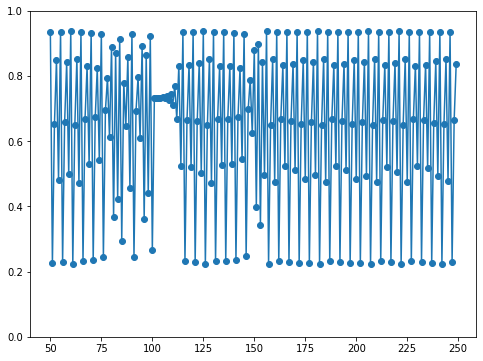

In [147]:
target = funct.reference_alpha[0]
#target = 2.5
plot_trace(df_log, funct, params, target)

## Bifurcation diagram

This plot is the one that is associated with the discovery of Chaos.  The x-axis shows different values of alpha, and the y-axis shows the 'limiting' points in a simulation.  That is, plot each parameter value on the x-axis, and show on the y-axis, the set of points which the above time trace reaches.

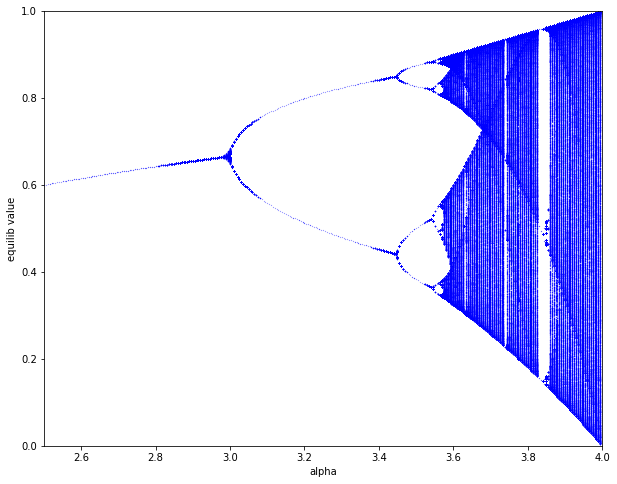

In [148]:
plt.figure(figsize=(10,8))
for s in case_summary:
    plt.plot(s[0]*np.ones(len(s[1])), s[1], 'b.', markersize=0.3)
plt.ylim([funct.ymin,funct.ymax])
plt.xlim([funct.alpha_start, funct.alpha_stop])
# comment this and adjust to zoom in
# plt.xlim([2.5, 4])
plt.xlabel('alpha')
plt.ylabel('equilib value')
plt.show()